# Nama = `Ahmad Hamdani`
# Nim = `233307092`
# Kelas = `4D`

1 K-Means Clustering
K-Means Clustering adalah algoritma unsupervised learning yang paling populer.

Kapan digunakan K-Means:
Saat kita memiliki data tanpa label (belum dikelompokkan dalam kategori apapun).

Tujuannya adalah mengelompokkan data berdasarkan kemiripan fitur mereka.

Cara kerja singkat K-Means:
Algoritma mengelompokkan data ke dalam sejumlah K cluster yang sudah ditentukan sebelumnya (K = jumlah cluster).
Proses dilakukan secara iteratif (berulang-ulang):
Setiap data akan ditugaskan ke salah satu dari K kelompok berdasarkan kemiripan fitur (seperti posisi di ruang data).

2 Aplikasi K-Means Clustering:

* Image Segmentation (Segmentasi Gambar)
Artinya: Memisahkan gambar menjadi bagian-bagian yang lebih kecil berdasarkan warna, tekstur, atau fitur lainnya.

* Customer Segmentation (Segmentasi Pelanggan)
Artinya: Mengelompokkan pelanggan berdasarkan karakteristik mereka.

* Species Clustering (Pengelompokan Spesies)
Artinya: Mengelompokkan organisme hidup ke dalam kelompok berdasarkan kesamaan ciri-ciri biologis mereka.

*  Anomaly Detection (Deteksi Anomali)
Artinya: Mendeteksi data yang tidak biasa atau menyimpang dari pola umum

* Clustering Languages (Pengelompokan Bahasa)
Artinya: Mengelompokkan bahasa berdasarkan kemiripan struktur atau kosakata

3 Intuisi K-Means Clustering
K-Means Clustering digunakan untuk mencari kelompok-kelompok alami (intrinsic groups) dalam dataset yang tidak memiliki label, dan menarik kesimpulan dari kelompok tersebut. K-Means ini berdasarkan metode clustering yang berpusat pada centroid.

4 Menentukan Nilai K

Algoritma K-Means bergantung pada menentukan jumlah cluster (nilai K) sebelum proses clustering dilakukan.
Untuk menemukan berapa banyak cluster yang paling sesuai dengan data,kita perlu:

* Menjalankan algoritma K-Means dengan beberapa nilai K yang berbeda.

* Membandingkan hasil clustering untuk setiap nilai K tersebut.
Artinya, kinerja K-Means sangat bergantung pada pilihan nilai K yang benar.

5 Metode Elbow
Metode Elbow digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means.

Bagaimana cara kerjanya?
Metode ini membuat plot grafik yang menunjukkan hubungan antara:

* Jumlah cluster (K) pada sumbu-x

* Nilai fungsi biaya (cost function) pada sumbu-y
Fungsi biaya di sini biasanya adalah jumlah kuadrat jarak semua titik data ke centroid terdekatnya (disebut juga inertia).

IMPLEMENTASI CODE 

1 Menginstall library
Memuat pustaka yang dibutuhkan seperti numpy (aljabar linear), pandas (pengolahan data), matplotlib & seaborn (visualisasi data), serta fungsi KMeans dan MinMaxScaler dari scikit-learn. Juga, warnings dipakai untuk menyembunyikan peringatan agar output bersih

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

2 Membaca file Mall_Customers.csv menjadi dataframe df menggunakan panda

In [2]:
# Load the dataset
df = pd.read_csv('data/unsupervised_3_Mall_Customers.csv')

3 Membersihkan dan Memperbaiki Data yang Hilang/Kosong

In [3]:
# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())


Dataset shape: (200, 5)

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

4 Mengecek missing values

In [4]:
# Mengecek missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


5 Menampilkan Data yang Sudah Bersih

In [5]:
# Menampilkan data setelah dibersihkan
print("\nData setelah dibersihkan:")
print(df.head())

# Jika ada missing values, kita bisa mengisinya atau menghapus baris yang kosong
# Contoh: df = df.dropna() untuk menghapus baris dengan missing values
# Atau df.fillna(df.mean(), inplace=True) untuk mengisi dengan nilai rata-rata


Data setelah dibersihkan:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


6 Menerapkan K-Means pada Dataset

  File "d:\belajar koding\python\Data Science\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ahmad\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ahmad\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^

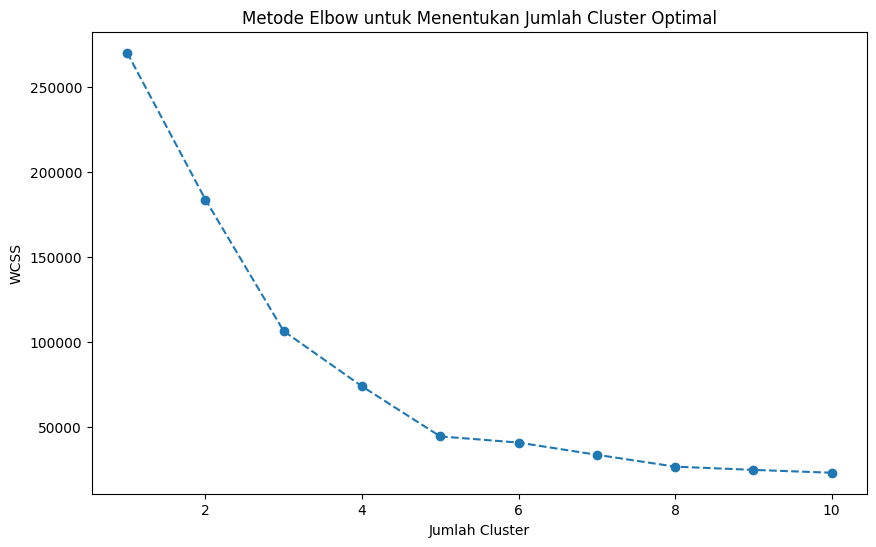

In [6]:
# Menggunakan fitur 'Annual Income' dan 'Spending Score' untuk clustering
X = df.iloc[:, [3, 4]].values

# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot metode Elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Menerapkan K-Means dengan jumlah cluster optimal (misalnya 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Menambahkan hasil clustering ke dataset
df['Cluster'] = y_kmeans

7 Mencari akurasi (Evaluasi Clustering)

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Score
db_score = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Score: {db_score}")

# Catatan: K-Means adalah unsupervised learning, jadi tidak ada akurasi sebenarnya
# Kita menggunakan metrik evaluasi clustering seperti di atas


Silhouette Score: 0.553931997444648
Davies-Bouldin Score: 0.5725628995597082


8 Analyze the clusters
Mengelompokkan data berdasarkan Cluster dan menghitung:

* Rata-rata umur (Age)
* Rata-rata pendapatan tahunan (Annual Income)
* Rata-rata skor pengeluaran (Spending Score)
* Jumlah pelanggan di tiap cluster

In [8]:
# Analyze the clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23


9 Feature scaling
Melakukan normalisasi data ke rentang [0, 1] menggunakan MinMaxScaler. Ini penting supaya semua fitur memiliki bobot yang sama dalam proses clustering.

In [9]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['Annual Income', 'Spending Score'])

10 Menampilkan Hasil dalam Bentuk Grafik/Plot

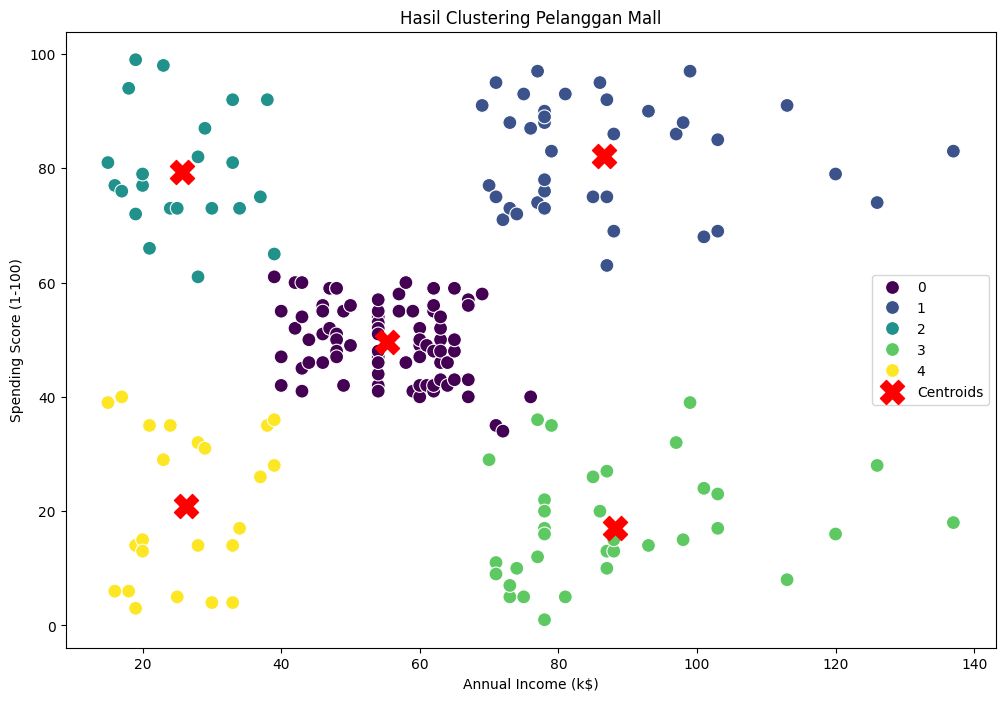

In [10]:
# Visualisasi hasil clustering
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, 
                palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('Hasil Clustering Pelanggan Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



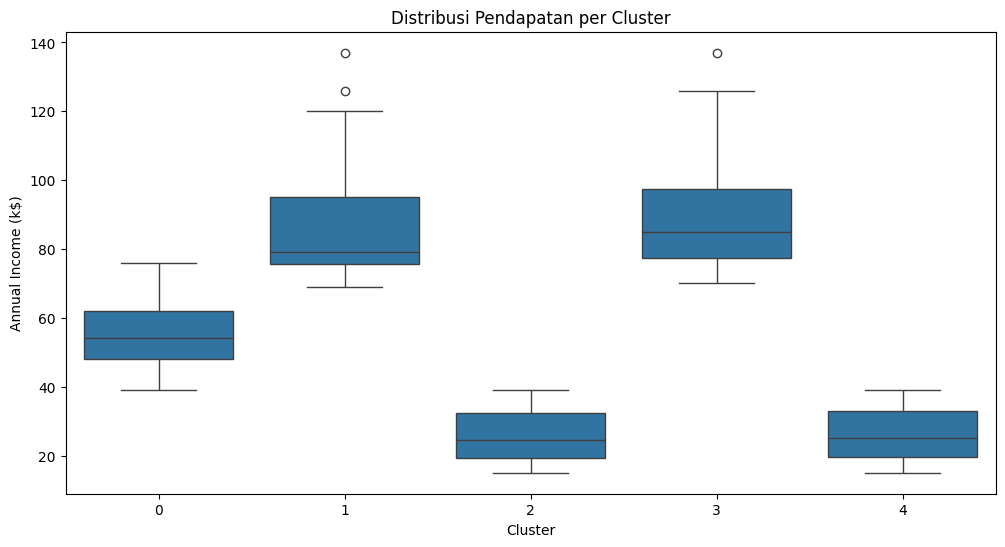

In [11]:
# Box plot untuk melihat karakteristik tiap cluster
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Distribusi Pendapatan per Cluster')
plt.show()

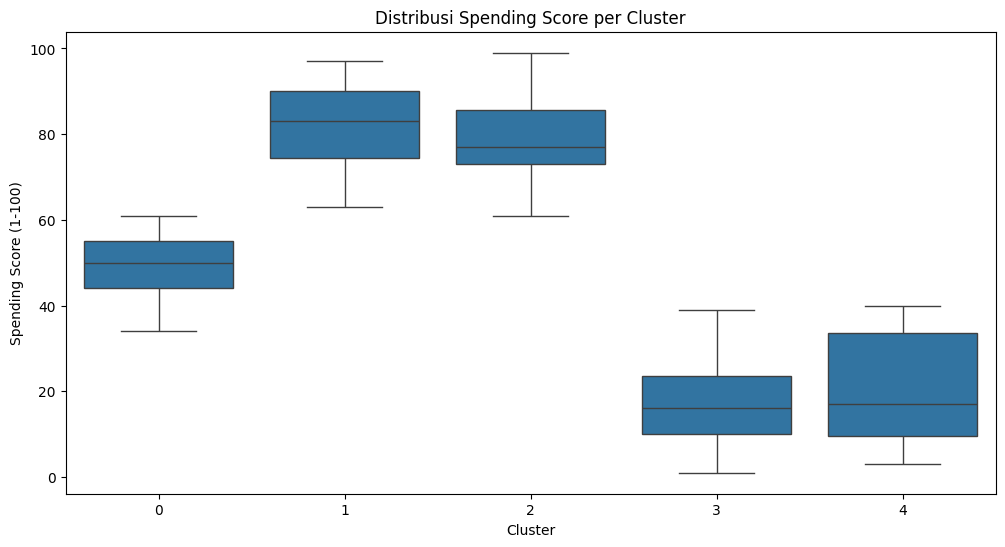

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Distribusi Spending Score per Cluster')
plt.show()

11 Visualize the clusters
Membuat scatter plot untuk memvisualisasikan customer berdasarkan Annual Income dan Spending Score yang sudah diskalakan, masing-masing cluster diberi warna berbeda. Centroid (pusat cluster) ditandai dengan tanda bintang kuning.

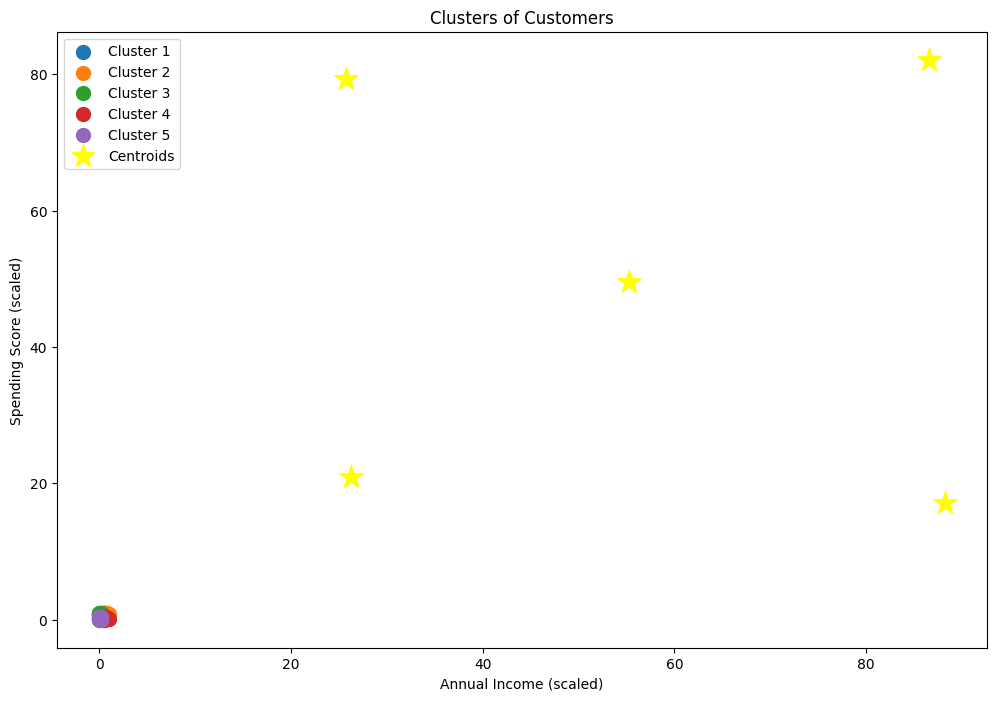

In [13]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i]['Annual Income'], 
                X_scaled[y_kmeans == i]['Spending Score'], 
                s=100, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

12 Visualize clusters in original scale
Membuat scatter plot kembali, tapi kali ini menggunakan data Annual Income dan Spending Score tanpa skala (dalam satuan aslinya seperti k$), supaya lebih mudah diinterpretasikan.

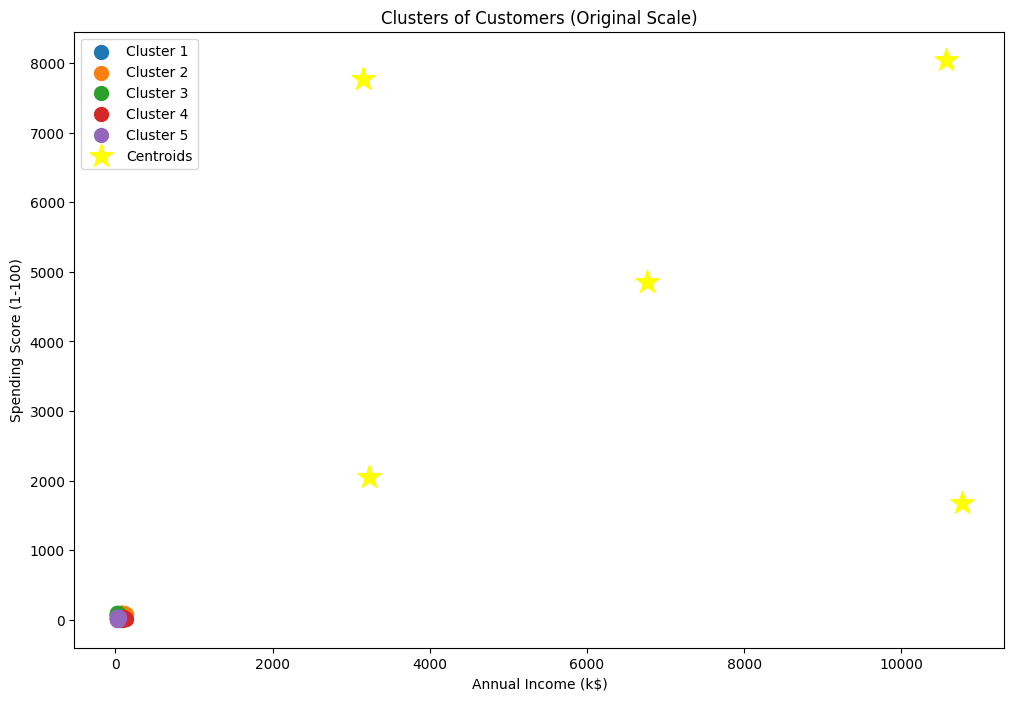

In [14]:
# Visualize clusters in original scale
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'], 
                df[df['Cluster'] == i]['Spending Score (1-100)'], 
                s=100, label=f'Cluster {i+1}')

plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Clusters of Customers (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()